# Convolution Neural Networks

# What exactly is CNN?

Convolutional neural networks are a powerful artificial neural network technique.


__Convolutional networks__(LeCun, 1989), also known asconvolutional neuralnetworks, or CNNs, are a specialized kind of neural network for processing data that has a known grid-like topology. Examples include time-series data, which canbe thought of as a 1-D grid taking samples at regular time intervals, and image data,which can be thought of as a 2-D grid of pixels. Convolutional networks have beentremendously successful in practical applications. The name “convolutional neuralnetwork” indicates that the network employs a mathematical operation calledconvolution. Convolution is a specialized kind of linear operation. Convolutionalnetworks are simply neural networks that use convolution in place of general matrixmultiplication in at least one of their layers.
These networks preserve the spatial structure of the problem and were developed for object recognition tasks such as handwritten digit recognition. They are popular because people can achieve state-of-the-art results on challenging computer vision and natural language processing tasks.

In this Article, you will discover convolutional neural networks for deep learning, also called ConvNets or CNNs. After completing this crash course, you will know:

- Architecture of CNN
- The building blocks used in CNNs, such as convolutional layers and pool layers
- How the building blocks fit together with a short worked example
- Tuning Hyperparameters
- Best practices for configuring CNNs on your object recognition tasks
- References for state-of-the-art networks applied to complex machine learning problems
- Activation Functions


### Disadvantages of using Artificial Neural Networks for Image Classification
- To much computation
- Treat local pixels same as pixels far apart- what it means here is the imaage recognition task is cenerted to locality. If the pixels are moved to different location , still it should be able to detect the image but thats hard with ANN.
- Sensitive to location of an object in a image

### How does human brain recognises the image so easily?
Lets got a little bit into human neuroscence and find how humnas recognize the images so easily





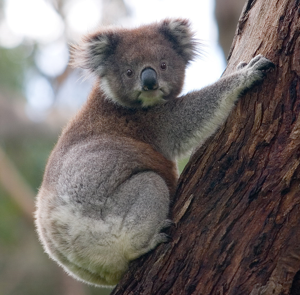

In [13]:
from PIL import Image

# Open the image
image = Image.open(r"C:\Users\Dell\Downloads\Koala_climbing_tree.jpg")

# Resize the image while maintaining the aspect ratio
max_size = (300,300)  # specify the maximum size as (width, height)
image.thumbnail(max_size)

# Save the resized image
image.save("Koala_climbing_tree_resized.jpg")
display(image)


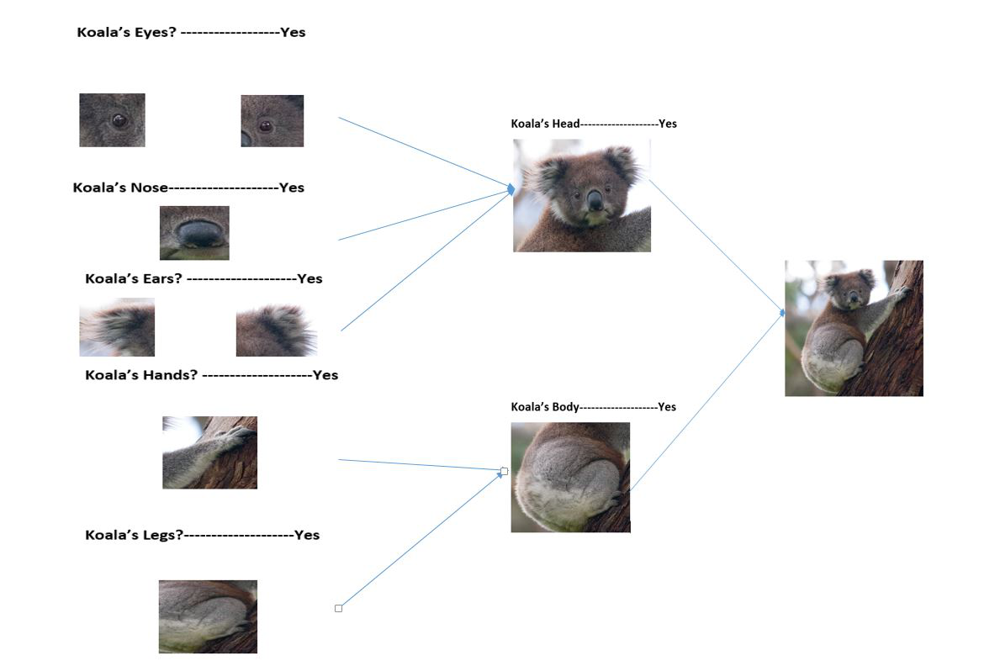

In [20]:
image = Image.open(r"C:\Users\Dell\Downloads\final Koala.jpg")

# Resize the image while maintaining the aspect ratio
max_size = (1000,1000)  # specify the maximum size as (width, height)
image.thumbnail(max_size)

# Save the resized image
#image.save("Koala_climbing_tree_resized.jpg")
display(image)


In the case of recognizing a koala in an image, a deep neural network would have multiple layers, each responsible for learning specific features. The initial layers would learn basic features such as edges, corners, and textures, while the subsequent layers would learn more complex features such as parts of a koala, such as its ears, nose, and eyes.

The output of these intermediate layers, which represent the learned features, would then be aggregated by subsequent layers to form higher-level representations. For example, a layer may aggregate the learned features of the ears, nose, and eyes to recognize the koala's head, and another layer may aggregate the features of the legs and hands to identify the body. Finally, the top layers of the neural network would combine these higher-level representations to determine if the input image contains a koala or not.

Digit classification  involves extracting low-level features like edges and corners from input images, and then aggregating these features to learn higher-level representations. These representations are used to make predictions about the class of the input, whether it's a particular digit or no.

This hierarchical feature representation allows deep neural networks to learn complex patterns and structures from raw input data, similar to how our brain processes information in a hierarchical manner to recognize objects or scenes. Deep learning models are able to automatically learn these features from large amounts of labeled data during the training process, without explicit programming of feature extraction rules.

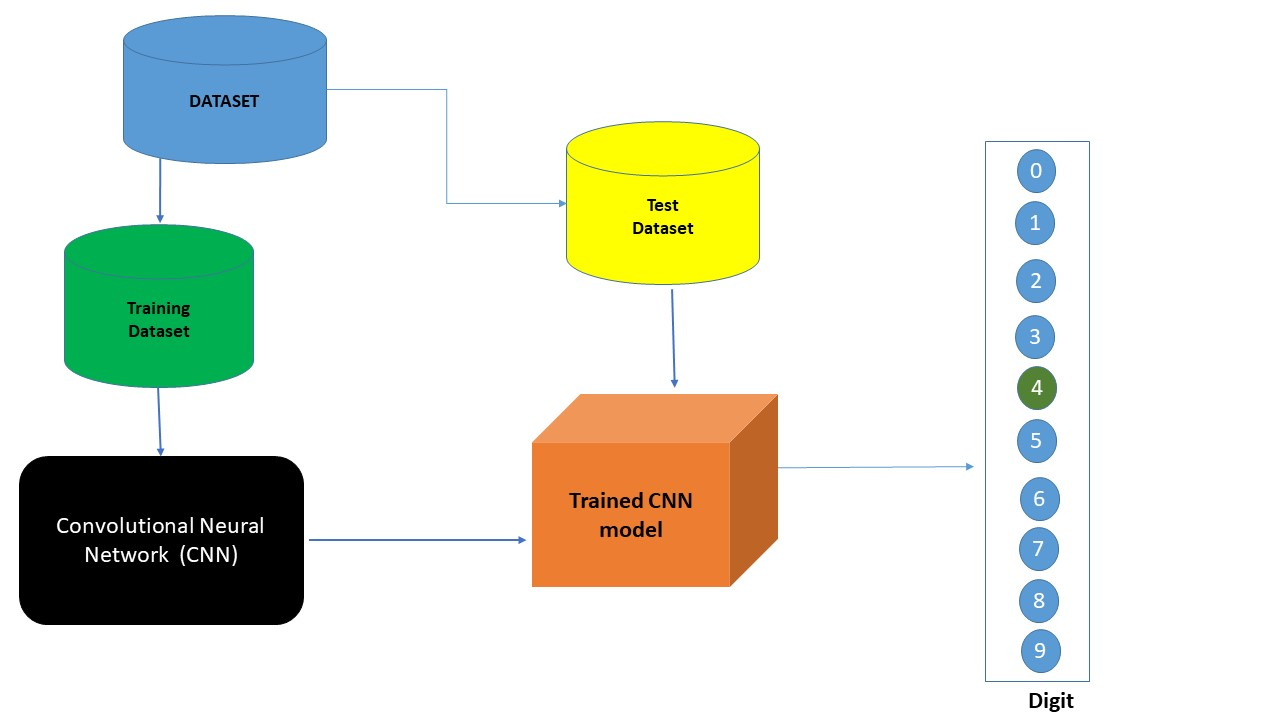

## Overview
Architecture of a traditional CNNConvolutional neural networks, also known as CNNs, are a specific type of neural networks that are generally composed of the following layers:

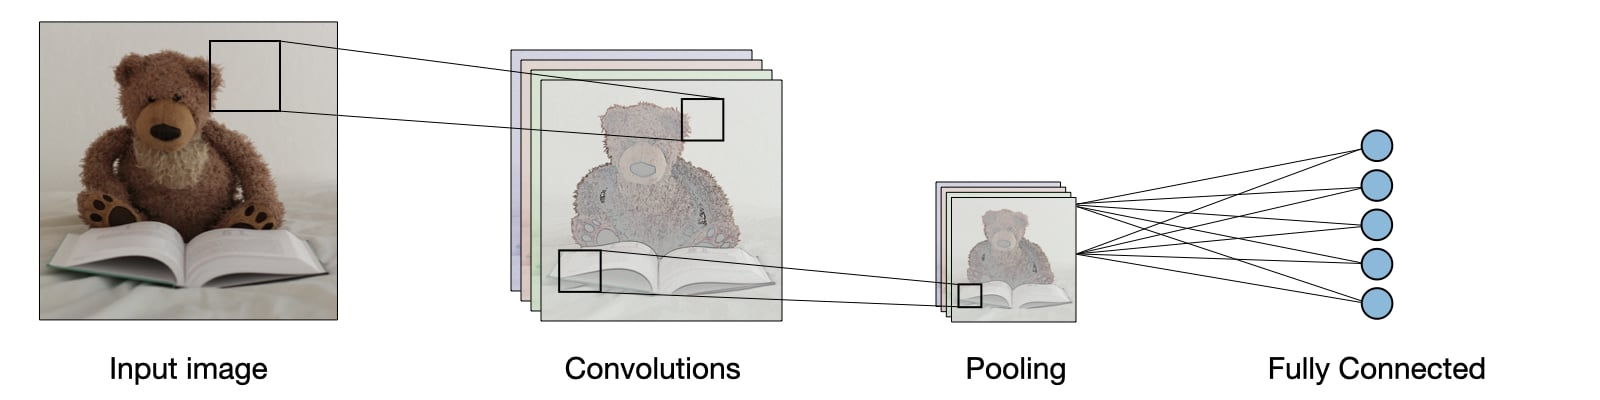

## Building Blocks of Convolutional Neural Networks
There are three types of layers in a convolutional neural network:

- Convolutional Layers
- Pooling Layers
- Fully-Connected Layers

### 1. Convolutional Layers
Convolutional layers are comprised of filters and feature maps.

- __Filters__

The filters are the “neurons” of the layer. They take weighted inputs and output a value. The input size is a fixed square called a patch or a receptive field.

If the convolutional layer is an input layer, then the input patch will be the pixel values. If deeper in the network architecture, then the convolutional layer will take input from a feature map from the previous layer.

- __Feature Maps__

The feature map is the output of one filter applied to the previous layer.

A given filter is drawn across the entire previous layer, moved one pixel at a time. Each position results in the activation of the neuron, and the output is collected in the feature map. You can see that if the receptive field is moved one pixel from activation to activation, then the field will overlap with the previous activation by (field width – 1) input values.

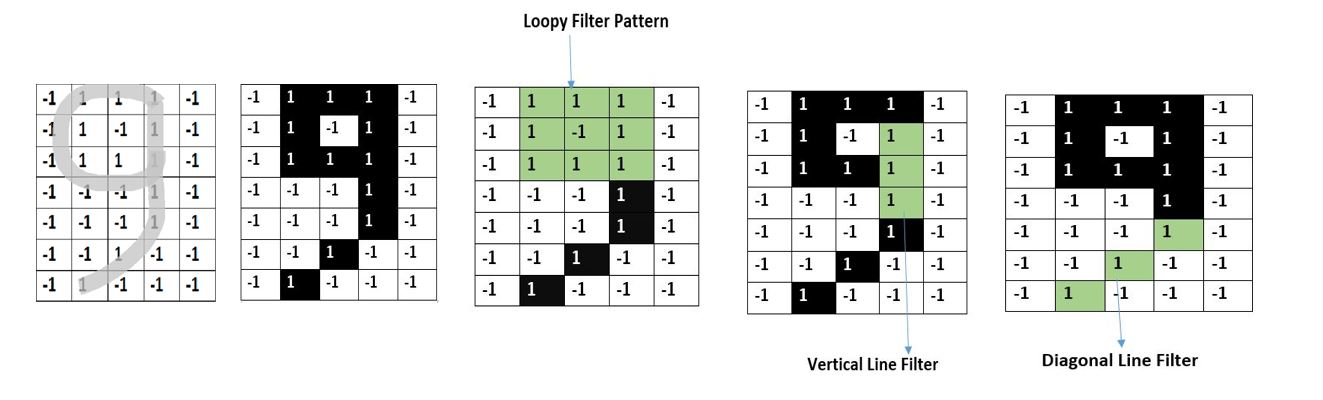

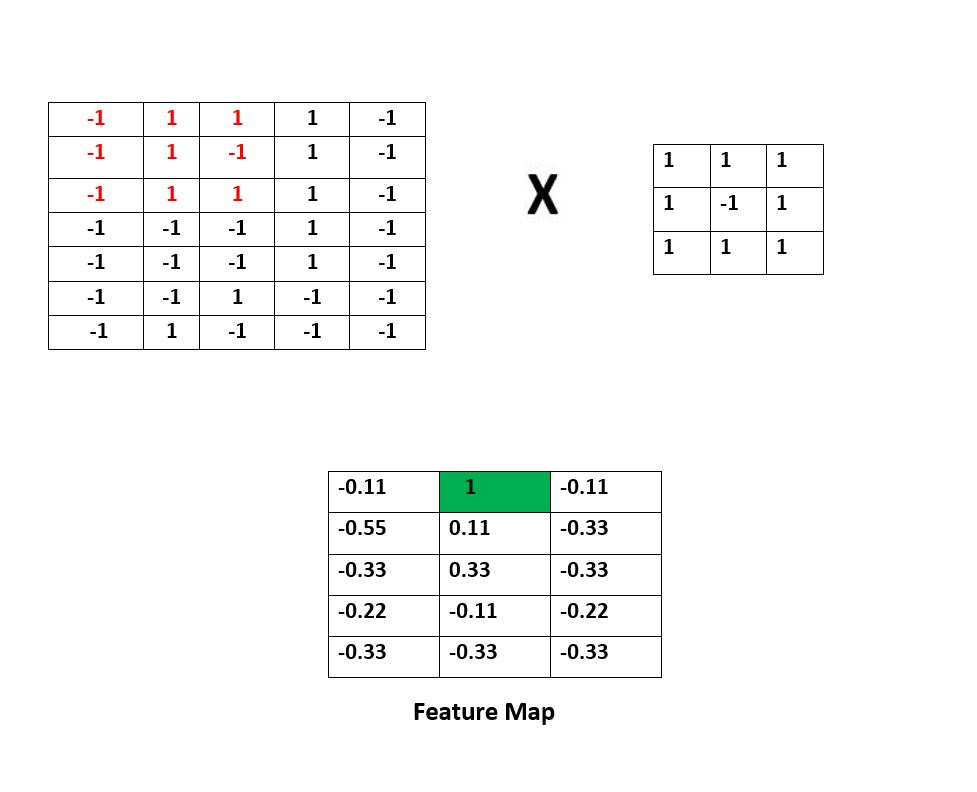

The way the convolution operation works is take 3*3 grid from original image and multiply with each number of filter. The filter here is loopy filter.Calculate each grid value and put the number in feature map as shown above. Where ever you find 1, it means you find there is a loopy filter.That means the feature is Activitated. In summary when you apply convolution operation, you get feature map, that has that particular feature detected.In a way filters are nothing but feature detectors
Further we can continue the convolution operation with different filetrs like diagonal and vertical filter and get the respective feature maps. This will further activiate the remaining features to detect the actual number.

If we have an input of size W x W x D and Dout number of kernels with a spatial size of F with stride S and amount of padding P, then the size of output volume can be determined by the following formula:

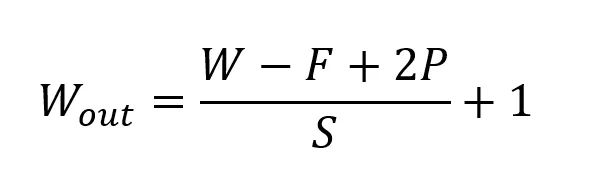



                                        Formula for Convolution Layer
                                        
 This will yield an output volume of size Wout x Wout x Dout.

### Motivation Behind Convolution Layer
The motivation behind convolution in computer vision is driven by three key ideas: sparse interaction, parameter sharing, and equivariant representation.

First, convolutional neural networks (CNNs) use sparse interaction, where the kernel or filter is smaller than the input, allowing them to capture meaningful information from local regions rather than processing every input unit. This reduces the memory requirements and improves the statistical efficiency of the model.

Second, CNNs employ parameter sharing, where the same set of weights is used across different spatial points in the input. This allows the model to reuse weights, reducing the number of parameters and enabling efficient learning from limited data.

Third, due to parameter sharing, CNNs exhibit equivariant representation, meaning that if the input is translated, the output will also be translated in the same way. This property allows CNNs to capture spatial patterns regardless of their location in the input, making them effective for tasks such as image recognition and object detection.

These three ideas together make convolution a powerful technique in computer vision, allowing CNNs to efficiently and effectively process large inputs while capturing spatial patterns with shared weights, resulting in highly accurate image analysis and recognition capabilities.







### 2. Pooling Layer
It is used to reduce the dimensions of data by applying pooling on the feature map to generate new feature maps with reduced dimensions. PL takes either maximum or average in the old feature map within a given stride.

If we have an activation map of size W x W x D, a pooling kernel of spatial size F, and stride S, then the size of output volume can be determined by the following formula:
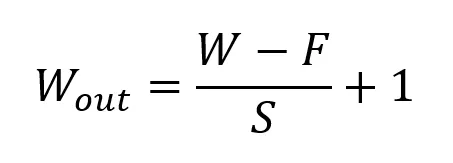

                                               Formula for padding layer

### 3. Fully-Connected Layer
Finally, the task of classification is done by the FC layer. Probability scores are calculated for each class label by a popular activation function called the softmax function.

### Non-Linearity Layers
Since convolution is a linear operation and images are far from linear, non-linearity layers are often placed directly after the convolutional layer to introduce non-linearity to the activation map.

There are several types of non-linear operations, the popular ones being:

1. Sigmoid

The sigmoid non-linearity has the mathematical form σ(κ) = 1/(1+e¯κ). It takes a real-valued number and “squashes” it into a range between 0 and 1.

However, a very undesirable property of sigmoid is that when the activation is at either tail, the gradient becomes almost zero. If the local gradient becomes very small, then in backpropagation it will effectively “kill” the gradient. Also, if the data coming into the neuron is always positive, then the output of sigmoid will be either all positives or all negatives, resulting in a zig-zag dynamic of gradient updates for weight.

2. Tanh

Tanh squashes a real-valued number to the range [-1, 1]. Like sigmoid, the activation saturates, but — unlike the sigmoid neurons — its output is zero centered.

3. ReLU

The Rectified Linear Unit (ReLU) has become very popular in the last few years. It computes the function ƒ(κ)=max (0,κ). In other words, the activation is simply threshold at zero.



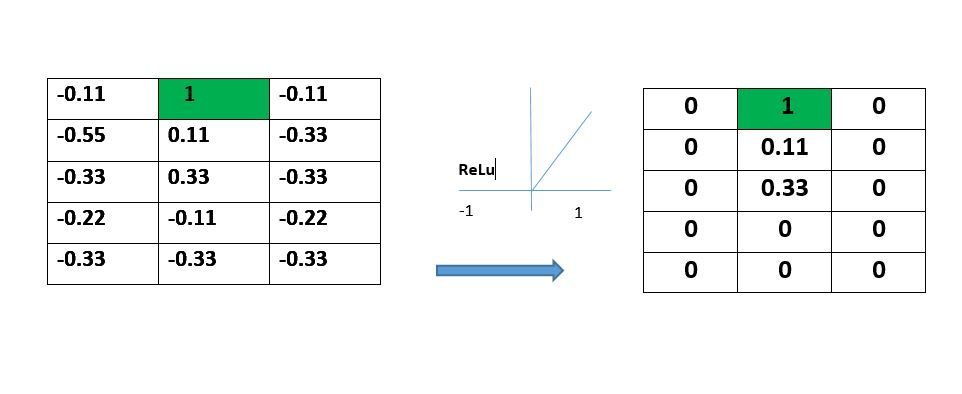


In above picture if you see, I have applied ReLu activation function function to remove non-linearity. What ReLu does?
ReLu function takes the feature map and replaces all negative values with 0. And if the feature map values are greater than 0, it keeps values as it is. ReLu helps with making the model non-linear.It also speeds up training and faster to compute

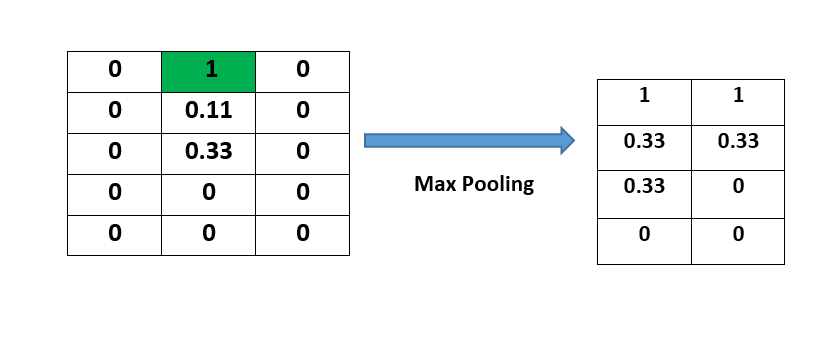

                                                2*2 filter with Stride=1


## Benefits of Pooling
In simple terms
- Reduces dimesnions and computation
- Reduce overfitting as there are less parameters
- Model is tolerant towards variants and distortions

Lets take a simple example and  classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [15]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard


import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np





AttributeError: module 'tensorboard.lazy' has no attribute 'lazy_load'

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()